In [9]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
np.random.seed(1)
N=1000
def generate_experiment_data(size=N):
    d1 = np.random.normal(loc = 0.0, scale = 1.0, size = N)
    d2 = np.random.normal(loc = 2.0, scale = 1.0, size = N)
    return d1,d2
Wafer1, Wafer2 = generate_experiment_data(size=N)
print(np.shape(Wafer1))

(1000,)


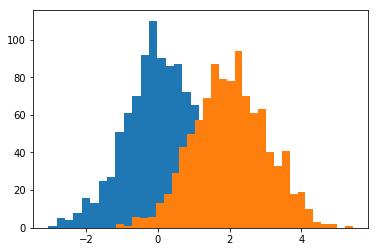

In [10]:
import matplotlib.pyplot as plt
plt.hist(Wafer1,bins=30)
plt.hist(Wafer2, bins=30)
plt.show()

In [3]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def get_param():
    param = {
        'seed': 0,
        'eta': 0.1,
        'colsample_bytree': 0.5,
        'silent': 1,
        'objective': 'reg:linear',
        'max_depth': 5,
        'min_child_weight': 3,
        'nthread': 4,
        'eval_metric': 'rmse'
    }
    
    return param

def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y), np.exp(yhat))

def xgboost_algorithm(X, y, param=None, num_boost_round=100, maglify=1.0):
    y = np.multiply(y, maglify)
    real_param = param
    if param is None:
        real_param = get_param()
    data = pd.DataFrame(np.column_stack([X]),columns=['x'])
    label = pd.DataFrame(np.column_stack([y]))
    print(data.head())
    print(label.head())
    dtrain = xgb.DMatrix(data, label=label)
    print(real_param)
    mode = xgb.train(real_param, dtrain=dtrain, num_boost_round=num_boost_round, feval=xg_eval_mae, maximize=False)
    dtest = xgb.DMatrix(data)
    print(2)
    predicted = mode.predict(dtest)
    predicted = np.divide(predicted, maglify)
    return mode, predicted

(1000,) <class 'numpy.ndarray'> (1000,) <class 'numpy.ndarray'>
          x
0 -1.153357
1 -1.016032
2 -0.791444
3 -0.621012
4 -0.617290
          0
0 -3.053764
1 -2.793085
2 -2.790996
3 -2.782534
4 -2.698362
{'seed': 0, 'eta': 0.1, 'colsample_bytree': 0.5, 'silent': 1, 'objective': 'reg:linear', 'max_depth': 5, 'min_child_weight': 3, 'nthread': 4, 'eval_metric': 'rmse'}
2


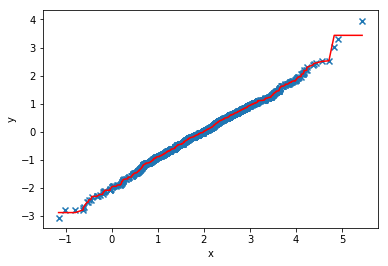

(array([ 4.,  2.,  4.,  4.,  5., 12.,  9., 11., 17., 21., 21., 35., 38.,
        45., 47., 57., 67., 71., 66., 51., 62., 61., 57., 50., 41., 41.,
        18., 24., 15., 17.,  8.,  7.,  4.,  3.,  2.,  0.,  0.,  0.,  0.,
         3.]),
 array([-2.877294  , -2.7194915 , -2.5616887 , -2.403886  , -2.2460835 ,
        -2.0882807 , -1.9304781 , -1.7726754 , -1.6148728 , -1.4570701 ,
        -1.2992675 , -1.1414648 , -0.9836621 , -0.8258595 , -0.66805685,
        -0.51025414, -0.3524515 , -0.19464886, -0.0368462 ,  0.12095647,
         0.27875912,  0.4365618 ,  0.59436446,  0.7521671 ,  0.90996975,
         1.0677724 ,  1.2255751 ,  1.3833778 ,  1.5411804 ,  1.6989831 ,
         1.8567858 ,  2.0145884 ,  2.172391  ,  2.3301938 ,  2.4879963 ,
         2.645799  ,  2.8036017 ,  2.9614043 ,  3.119207  ,  3.2770097 ,
         3.4348123 ], dtype=float32),
 <a list of 40 Patch objects>)

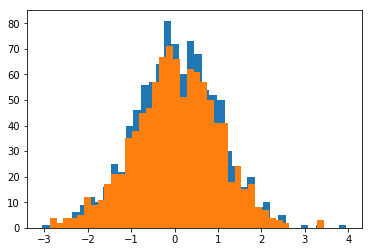

In [4]:
def plot_data(X, y, predicted):
    plt.scatter(X, y, marker='x')
    plt.plot(X, predicted, c='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
X = np.sort(Wafer2)
y = np.sort(Wafer1)
print(np.shape(X), type(X), np.shape(y), type(y))
mode, predicted = xgboost_algorithm(X, y)
plot_data(X, y, predicted)
plt.hist(y,bins=40)
plt.hist(predicted,bins=40)

In [5]:
def compare_equal(data1, data2, precision=0.01):
    delta = abs(data1)*precision
    if data2 > data1 - delta and data2 < data1 + delta:
        return True
    else:
        return False
    
def compute_accuracy(Data1, Data2, sort=True, precision=0.01):
    X1 = Data1
    X2 = Data2
    if sort:
        X1 = np.sort(Data1)
        X2 = np.sort(Data2)
    correct_prediction = 0
    TotalCount = len(X1)
    for i in range(0, TotalCount):
        if compare_equal(X1[i], X2[i], precision):
            correct_prediction +=1
    
    accuracy = correct_prediction/TotalCount
    return accuracy

In [6]:
accuracy = compute_accuracy(predicted, y, sort=True, precision=0.01)
print(accuracy)

0.857


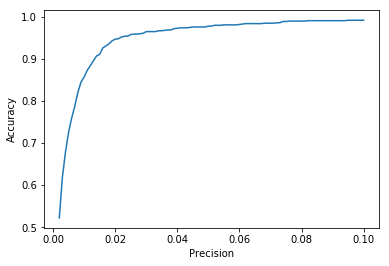

0.992


In [8]:
precisions = np.arange(0.1, 0.001, -0.001)
accuracies = [compute_accuracy(predicted, y, sort=True, precision=i) for i in precisions]
import matplotlib.pyplot as plt
plt.plot(precisions, accuracies)
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.show()
print(np.max(accuracies))